In [14]:
# imports
from __future__ import division
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pyzdde.zdde as pyz
import pyzdde.arraytrace as at
%matplotlib inline

In [15]:
ln = pyz.createLink() # create a DDE link object for communication

In [16]:
zfile = os.path.join('C:\Users\CAD User\Desktop\Zemax\LSST', 'lsst_spherical_abberation.zmx')

In [17]:
ln.zLoadFile(zfile)

0

In [18]:
# Surfaces in the sequential lens data editor
ln.ipzGetLDE()

SURFACE DATA SUMMARY:

Surf       	Type        	Radius        	Thickness           	Glass        	Diameter        	Conic        	Comment
 OBJ	 STANDARD	       Infinity	       Infinity	                     	             0	              0
   1	 STANDARD	       Infinity	           1200	                     	      8858.927	              0	 Center Cap
   2	 STANDARD	       Infinity	              0	                     	      8785.601	              0	 Center plate 1
   3	 STANDARD	       Infinity	              0	                     	      8785.601	              0	 Center plate 2
   4	 COORDBRK	              -	              0	                     	             -	              -
   5	 STANDARD	       Infinity	              0	                     	      8785.601	              0	 Center plate 3
   6	 COORDBRK	              -	              0	                     	             -	              -
   7	 COORDBRK	              -	              0	                     	             -	              -
   

In [19]:
# General System properties
ln.zGetSystem()

systemData(numSurf=38, unitCode=0, stopSurf=22, nonAxialFlag=1, rayAimingType=1, adjustIndex=1, temp=20.0, pressure=1, globalRefSurf=38)

In [20]:
# Paraxial/ first order properties of the system
ln.zGetFirst()

firstOrderData(EFL=10309.90504, paraWorkFNum=1.233242229, realWorkFNum=1.233261513, paraImgHeight=314.9960882, paraMag=0.0)

In [21]:
# duplicate of zGetFirst() for use in the notebook
ln.ipzGetFirst()

Paraxial magnification : 0.0
Real working F/#       : 1.233261513
Effective focal length : 10309.90504
Paraxial working F/#   : 1.233242229
Paraxial image height  : 314.9960882


In [22]:
# ... another example is the zGetSystemAper() that returns information about the aperture. 
# The aperture type is retuned as a code which we might not remember always ...
ln.zGetSystemAper()

systemAper(apertureType=0, stopSurf=22, value=8360.0)

In [23]:
# ...with the duplicate, ipzGetSystemAper(), we can immediately know that
# the aperture type is the Entrance Pupil Diameter (EPD)
ln.ipzGetSystemAper()

Aperture Type           : EPD
Value (system aperture) : 8360.0
Stop surface            : 22


In [24]:
# information about the field definition
ln.ipzGetFieldData()

Field Normalization : Radial
Type                : Angles in degrees
Number of Fields    : 7
Max Y               : 1.75
Max X               : 1.75
   X       Y     Weight   VDX     VDY     VCX     VCY     VAN   
 0.00    0.00   1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  
 0.00    0.50   1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  
 0.00    1.23   1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  
 0.00    1.75   1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  
 0.00   -0.50   1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  
 0.00   -1.23   1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  
 0.00   -1.75   1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  


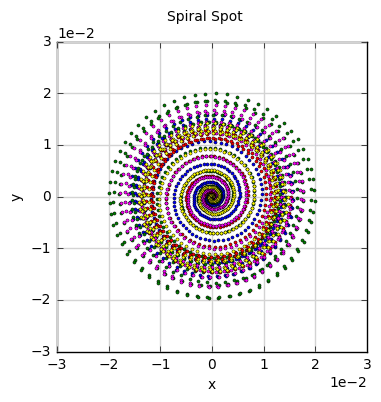

In [25]:
hx = 0.0
hy = 0.0
spirals = 10 #100
rays = 600   #6000
(xu,yu,zu,intensityu) = ln.zSpiralSpot(hx,hy,1,spirals,rays)
(xg,yg,zg,intensityg) = ln.zSpiralSpot(hx,hy,2,spirals,rays)
(xr,yr,zr,intensityr) = ln.zSpiralSpot(hx,hy,3,spirals,rays)
(xi,yi,zi,intensityi) = ln.zSpiralSpot(hx,hy,4,spirals,rays)
(xz,yz,zz,intensityz) = ln.zSpiralSpot(hx,hy,5,spirals,rays)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.scatter(xu,yu,s=5,c='blue',linewidth=0.35,zorder=20)
ax.scatter(xg,yg,s=5,c='green',linewidth=0.35,zorder=21)
ax.scatter(xr,yr,s=5,c='red',linewidth=0.35,zorder=22)
ax.scatter(xi,yi,s=5,c='magenta',linewidth=0.35,zorder=23)
ax.scatter(xz,yz,s=5,c='yellow',linewidth=0.35,zorder=24)
ax.set_xlabel('x');ax.set_ylabel('y')
fig.suptitle('Spiral Spot')
ax.grid(color='lightgray', linestyle='-', linewidth=1)
ax.ticklabel_format(scilimits=(-2,2))

plt.show()

In [26]:
def many_spots(ln, hxs,hys,wavenum=1,spirals=10,rays=600):
    fovxs, fovys, xs, ys = np.array([]), np.array([]), np.array([]), np.array([])
    for hx, hy in zip(hxs,hys):
        (x,y,z,intensity) = ln.zSpiralSpot(hx,hy,wavenum,spirals,rays)
        fovxs, fovys, xs, ys = np.append(fovxs,hx*np.ones((len(x),1))), np.append(fovys,hy*np.ones((len(y),1))), np.append(xs,x), np.append(ys,y)
    return fovxs, fovys, xs, ys

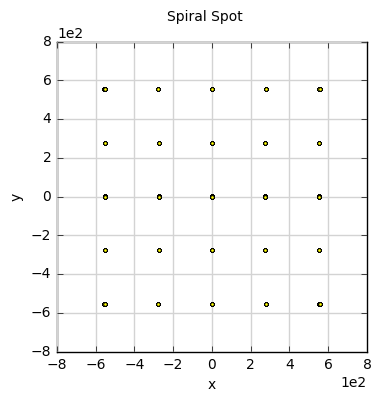

In [27]:
hxs, hys = np.linspace(-1.75,1.75,5), np.linspace(-1.75,1.75,5)
[HXs,HYs] = np.meshgrid(hxs,hys)
hxs, hys = HXs.flatten(), HYs.flatten()
fovxu, fovyu, xu, yu = many_spots(ln, hxs, hys, wavenum=1, spirals=10, rays=600)
fovxg, fovyg, xg, yg = many_spots(ln, hxs, hys, wavenum=2, spirals=10, rays=600)
fovxr, fovyt, xr, yr = many_spots(ln, hxs, hys, wavenum=3, spirals=10, rays=600)
fovxi, fovyi, xi, yi = many_spots(ln, hxs, hys, wavenum=4, spirals=10, rays=600)
fovxz, fovyz, xz, yz = many_spots(ln, hxs, hys, wavenum=5, spirals=10, rays=600)

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.scatter(xu,yu,s=5,c='blue',linewidth=0.35,zorder=20)
ax.scatter(xg,yg,s=5,c='green',linewidth=0.35,zorder=21)
ax.scatter(xr,yr,s=5,c='red',linewidth=0.35,zorder=22)
ax.scatter(xi,yi,s=5,c='magenta',linewidth=0.35,zorder=23)
ax.scatter(xz,yz,s=5,c='yellow',linewidth=0.35,zorder=24)
ax.set_xlabel('x');ax.set_ylabel('y')
fig.suptitle('Spiral Spot')
ax.grid(color='lightgray', linestyle='-', linewidth=1)
ax.ticklabel_format(scilimits=(-2,2))

plt.show()

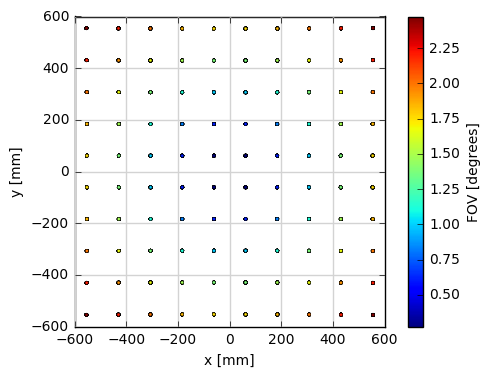

In [28]:
hxs, hys = np.linspace(-1.75,1.75,10), np.linspace(-1.75,1.75,10)
[HXs,HYs] = np.meshgrid(hxs,hys)
hxs, hys = HXs.flatten(), HYs.flatten()
fovx, fovy, x, y = many_spots(ln, hxs, hys, wavenum=1, spirals=10, rays=60)
fov = np.sqrt(fovx**2 + fovy**2)

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.scatter(x,y,s=5,c=fov,linewidth=0.35,zorder=21)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
cbar = plt.colorbar()
cbar.set_label('FOV [degrees]')
plt.grid(color='lightgray', linestyle='-', linewidth=1)
#ax.ticklabel_format(scilimits=(-2,2))
plt.axis([-600,600,-600,600])

plt.show()